Задание
Решите численно уравнение переноса
$$u_t + au_x = 0,$$ используя схему Лакса с начальным условием
$$u(x,0) = \sin(2\pi\frac{x}{L}), 0 < x < L, L = 10,$$
и периодическими граничными условиями.
Примените дважды сгущение сеток вдвое, начиная с сетки, включающей
101 точку по пространственной переменной, и проведите расчеты до
T = 9. Оцените реальный порядок сходимости схемы.
Решите эту задачу для чисел Куранта $\frac{τ}{h}$ = 1.0, 0.6, 0.3.

Начальное условие:
$$
U_j^{0}=\sin\left(\frac{2\pi jh}{L}\right)
$$

Схема Лакса:
$$
\frac{U_{j}^{n+1}-\frac{1}{2}(U_{j+1}^{n}+U_{j-1}^{n})}{\tau}+\frac{a}{2h}(U_{j+1}^{n}-U_{j-1}^{n})=0
$$

Периодические граничные условия означают, что $U_0^n=U_{N}^{n}$

Значения на сетке будем хранить в массиве `u`, а `nt` и `nx` будут обозначать число временных и пространственных точек, соответственно.

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# задаем начальное условие
def initial_condition(x, L):
    return np.sin(2 * np.pi * x / L)

In [110]:
def Lax(a, Nx, c, L, T):
    x = np.linspace(0., L, Nx)
    dx = x[1] - x[0]
    dt = dx * c / a
    Nt = int(T / dt)
    
    u = np.zeros((Nt, Nx))

    u[0, :] = initial_condition(x, L)

    for n in range(Nt - 1):
        for j in range(1, Nx - 1):
            u[n + 1, j] = (u[n, j - 1] + u[n, j + 1]) / 2 - c / 2 * (u[n, j + 1] - u[n, j - 1])
        # Периодические граничные условия
        u[n + 1, -1 ] = (u[n, Nx - 2] + u[n, 1]) / 2 - c / 2 * (u[n, 1] - u[n, Nx - 2])
        u[n + 1, 0] =  u[n + 1, -1 ]
    
    return u, x

In [111]:
def Analitic(L, a, T, nx, c):
    x = np.linspace(0., L, nx)
    dx = x[1] - x[0]
    dt = dx * c / a
    nt = int(T / dt)
    
    u = np.zeros((nt, nx))
    
    for n in range(nt):
        for j in range(0, nx):
            u[n][j] = np.sin(2  * np.pi / L * (j * dx - a * dt * n))
    
    return u, x

In [112]:
def norm(ul, ua, size):
    m = 0
   
    for j in range(0, size[0]):
        for i in range(0, size[1]):
            m_new = ul[j][i] - ua[j][i]
            
            if m_new > m:
                m = m_new
    return m

In [113]:
def convergence(L, a, T, c):
    nr_list = []

    for nx in [101, 201, 401, 801, 1601]:
        dx = L / (nx - 1)
        size = [int(T * a / (dx * c)), nx]
        
        ul, _ = Lax(a, nx, c, L, T)
        ua, _ = Analitic(L, a, T, nx, c)
        nr = norm(ul, ua, size)
        nr_list.append(nr)

    # Метод наименьших квадратов
    h_list = [L / (nx - 1) for nx in [101, 201, 401, 801, 1601]]
    p = np.polyfit(np.log(h_list), np.log(nr_list), 1)
    print("Оценка порядка сходимости:", abs(p[0]), "\n")

In [114]:
def plot(u, x, c, nx):
    # График решения уравнения переноса
    plt.plot(x, u[-1, :], label=f"aτ/h={c:.2f}, N={nx}")
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.legend()
    plt.show()

In [115]:
def Thickening(nx, c):
    L = 10
    a = 1            
    T = 9

    ul, xl = Lax(a, nx, c, L, T)
    ua, xa = Analitic(L, a, T, nx, c)

    print("Численное")
    plot(ul, xl, c, nx)
    print("Аналитическое")
    plot(ua, xa, c, nx)

    convergence(L, a, T, c)

N = 101 

Численное


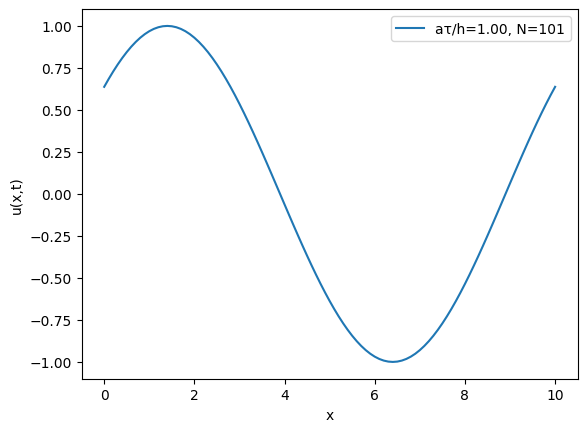

Аналитическое


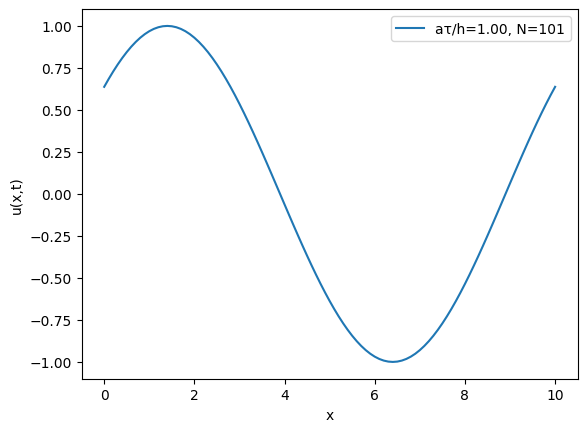

Оценка порядка сходимости: 0.05008540711228199 

N = 202 

Численное


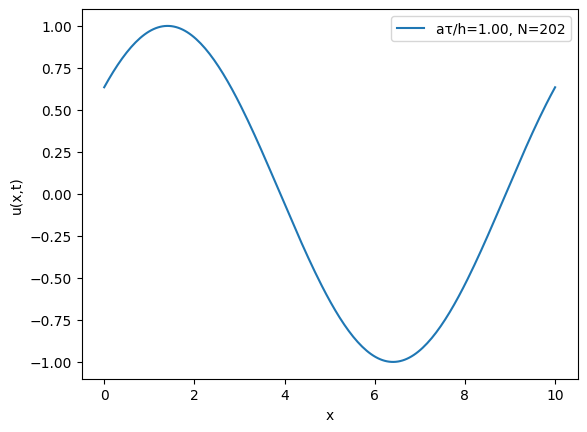

Аналитическое


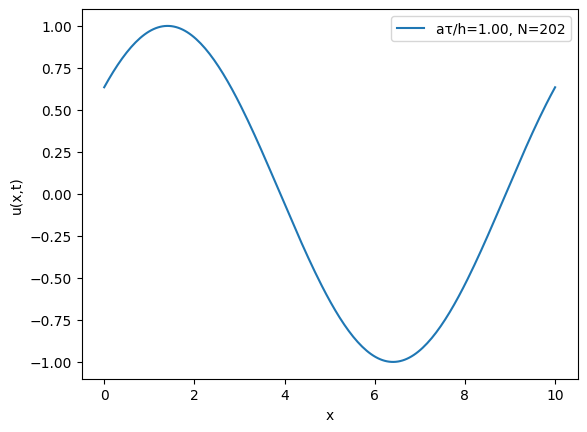

Оценка порядка сходимости: 0.05008540711228199 

N = 404 

Численное


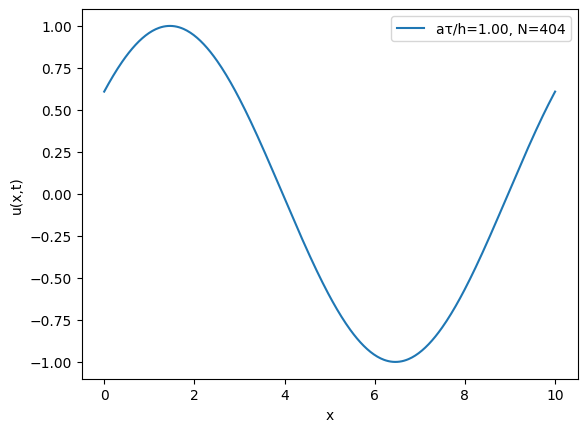

Аналитическое


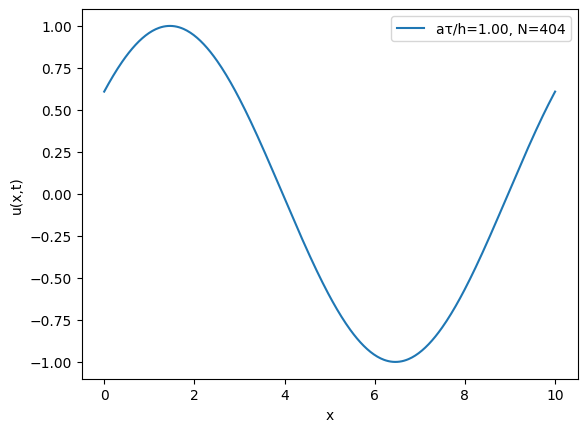

Оценка порядка сходимости: 0.05008540711228199 



In [116]:
n = [101, 202, 404]
c = 1.0

for nx in n:
    print("N =", nx, "\n")
    Thickening(nx, c)

N = 101 

Численное


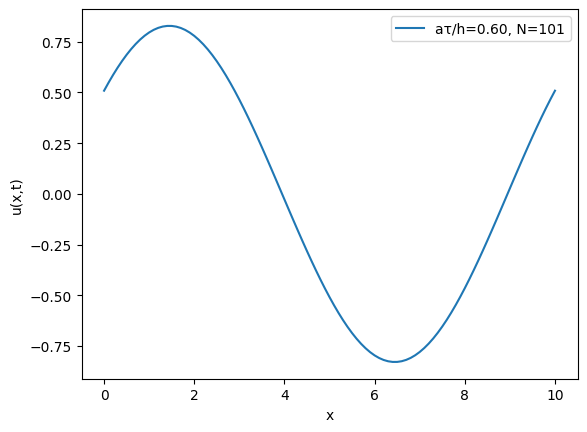

Аналитическое


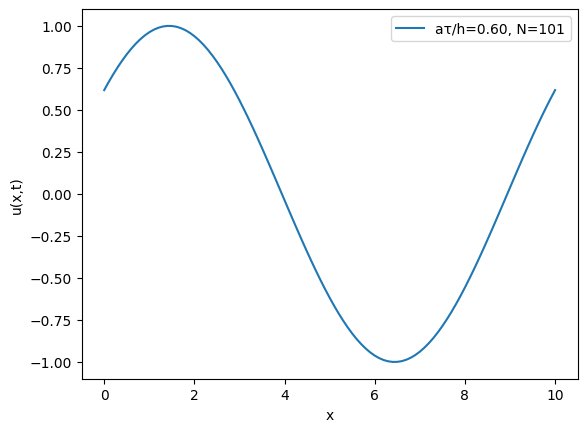

Оценка порядка сходимости: 0.9678351630476013 

N = 202 

Численное


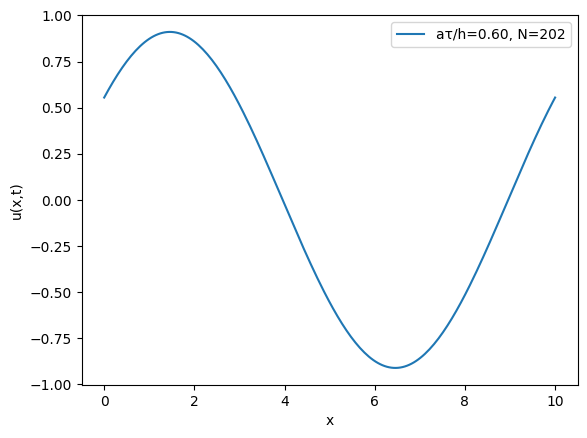

Аналитическое


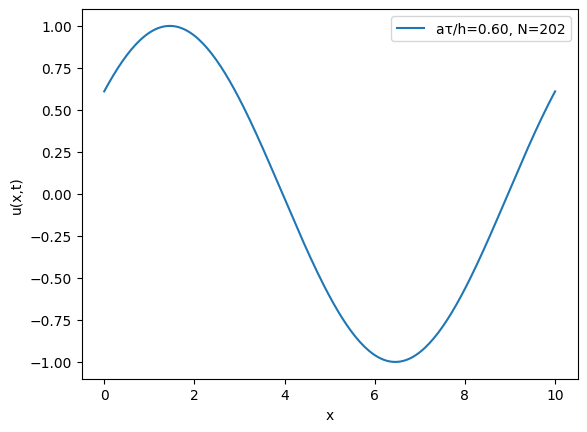

Оценка порядка сходимости: 0.9678351630476013 

N = 404 

Численное


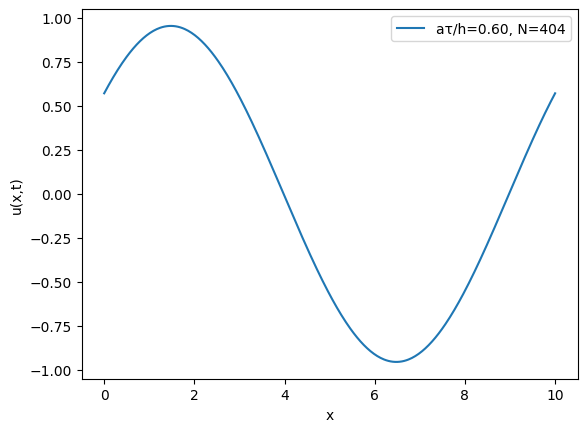

Аналитическое


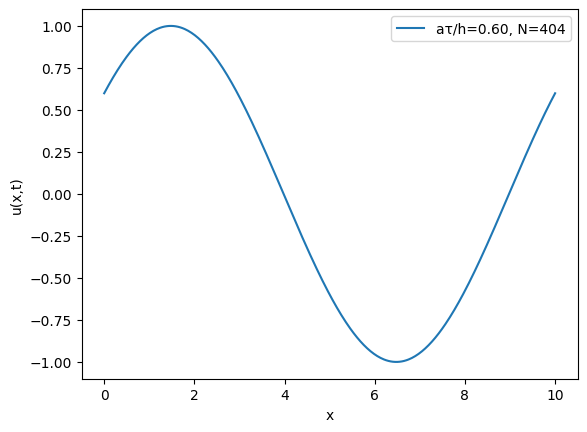

Оценка порядка сходимости: 0.9678351630476013 



In [117]:
n = [101, 202, 404]
c = 0.6

for nx in n:
    print("N =", nx, "\n")
    Thickening(nx, c)

N = 101 

Численное


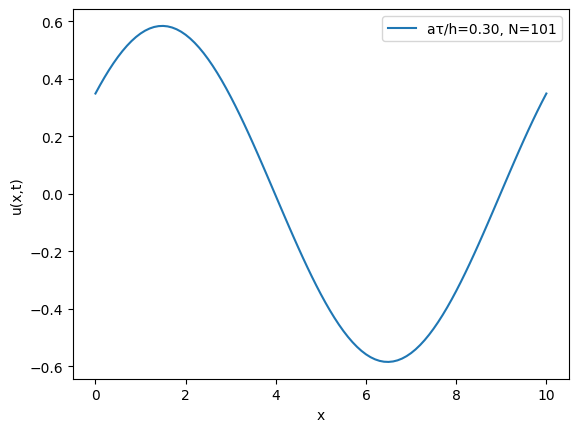

Аналитическое


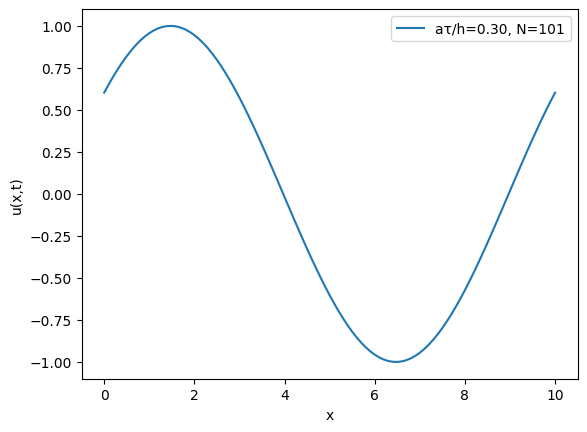

Оценка порядка сходимости: 0.9156089188488595 

N = 202 

Численное


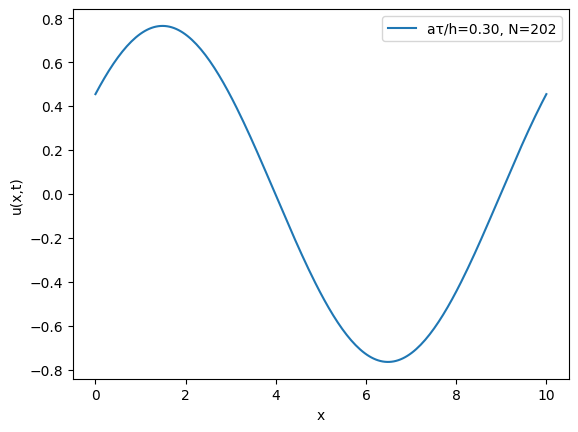

Аналитическое


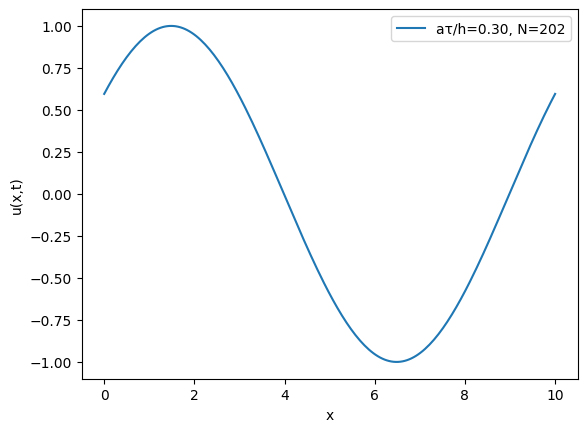

Оценка порядка сходимости: 0.9156089188488595 

N = 404 

Численное


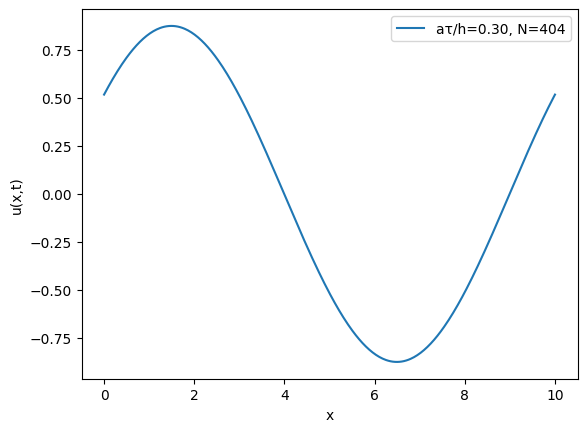

Аналитическое


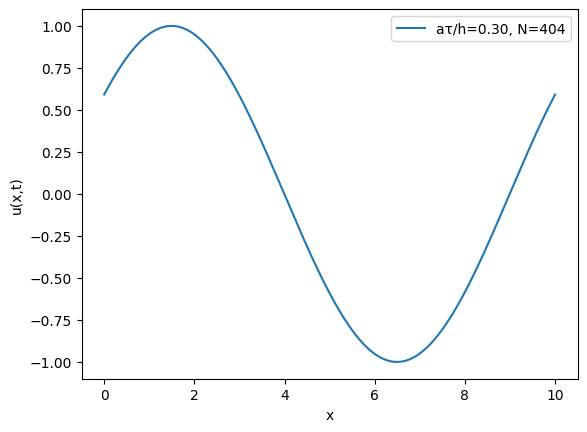

Оценка порядка сходимости: 0.9156089188488595 



In [118]:
n = [101, 202, 404]
c = 0.3

for nx in n:
    print("N =", nx, "\n")
    Thickening(nx, c)